# Assignment 2

## Number 1: 

### Data File 1:

## 1A. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

d2 = pd.read_csv('data1.txt', sep=" ", header=None, encoding='utf-8')
d2.columns = ["d","e","f"]


data = np.column_stack([d2.e, d2.f])

X1 = data
y1 = d2.d

print('Class labels:', np.unique(y1))




Class labels: [-1  1]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.1, random_state=1, stratify=y1)


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

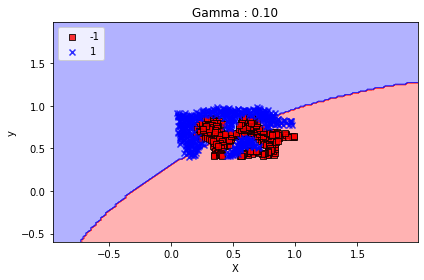

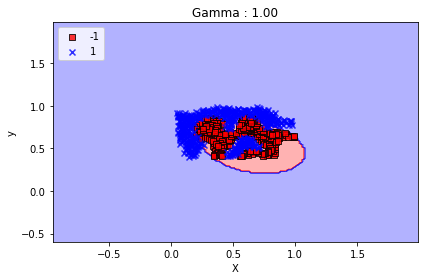

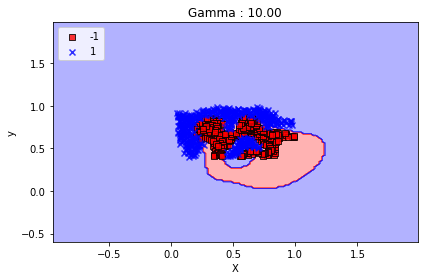

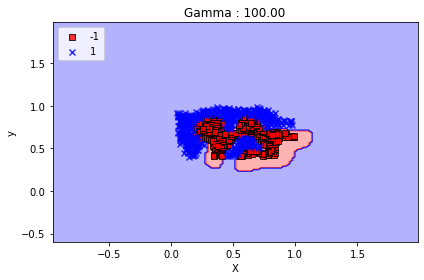

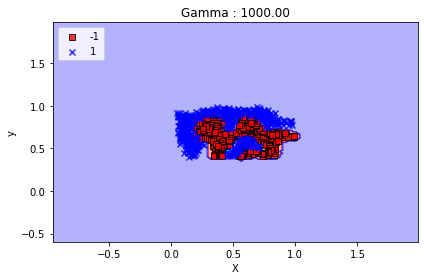

In [6]:
from sklearn.svm import SVC

k = [.1, 1, 10, 100, 1000]

i = .1

for i in k:
    svm = SVC(kernel='rbf', random_state=1, gamma=i, C=1.0)    
    svm.fit(X1, y1)

    plot_decision_regions(X1, y1, classifier=svm, test_idx=None, resolution =.02)

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Gamma : %0.2f' %i)
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/03_01.png', dpi=300)
    plt.show()

## 1B:

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

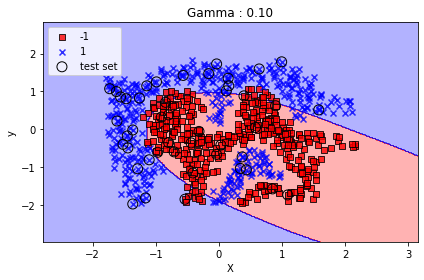

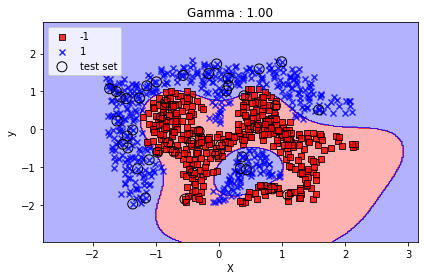

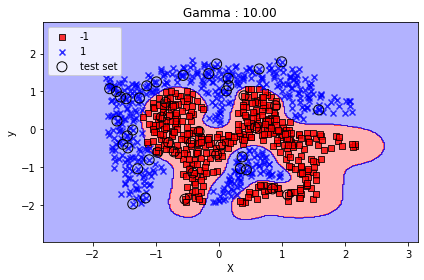

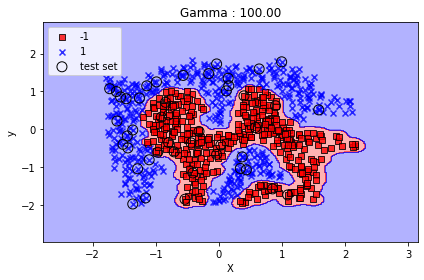

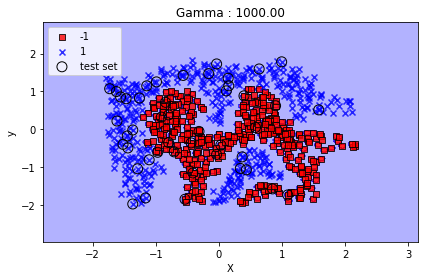

In [8]:
from sklearn.svm import SVC

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

k = [.1, 1, 10, 100, 1000]

i = .1

for i in k:
    svm = SVC(kernel='rbf', random_state=1, gamma=i, C=1.0)
    svm.fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, y_combined,
                          classifier=svm, test_idx=range(105, 150))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.title('Gamma : %0.2f' %i)
    plt.tight_layout()
    plt.legend(loc='upper left')
    #plt.savefig('images/03_15.png', dpi=300)
    plt.show()
    y_pred = ppn.predict(X_test_std)
    
    i *= 10

In [9]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 33


In [10]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.598


In [11]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.598


### Data File 2: 

## 1A:

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

d2 = pd.read_csv('data2.txt', sep=" ", header=None)
d2.columns = ["d","e","f"]

data = np.column_stack([d2.e, d2.f])

X2 = data
y2 = d2.d

print('Class labels:', np.unique(y2))



Class labels: [-1  1]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, test_size=0.1, random_state=1, stratify=y2)


In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X2, y2, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y2))])

    # plot the decision surface
    x1_min, x1_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    x2_min, x2_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z2 = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z2 = Z2.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z2, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y2)):
        plt.scatter(x=X2[y2 == cl, 0], 
                    y=X2[y2 == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X2[test_idx, :], y2[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

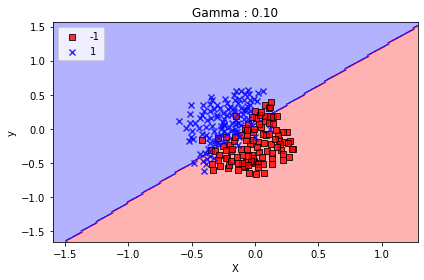

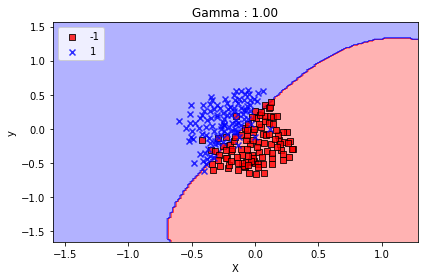

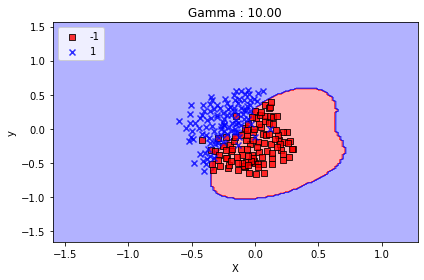

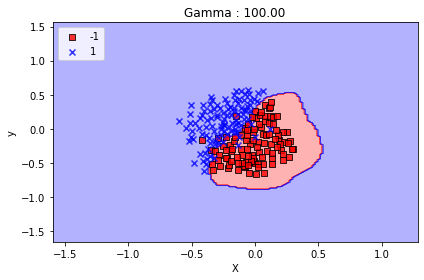

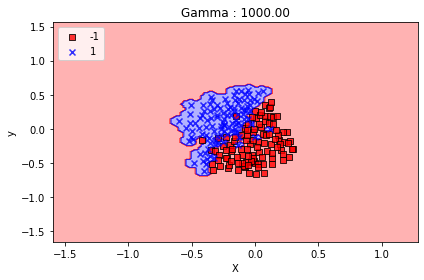

In [21]:
from sklearn.svm import SVC

k = [.1, 1, 10, 100, 1000]

i = .1

for i in k:
    svm = SVC(kernel='rbf', random_state=1, gamma=i, C=1.0)    
    svm.fit(X2, y2)

    plot_decision_regions(X2, y2, classifier=svm, test_idx=None, resolution =.02)

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Gamma : %0.2f' %i)
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/03_01.png', dpi=300)
    plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

## 1B:

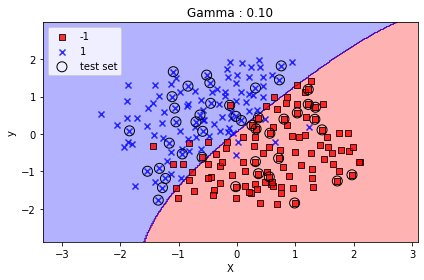

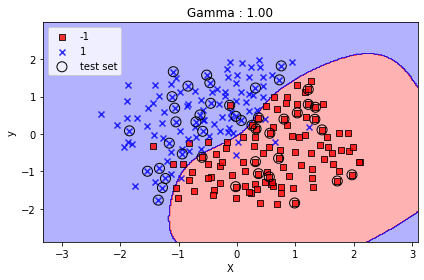

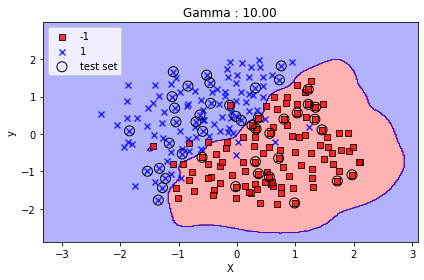

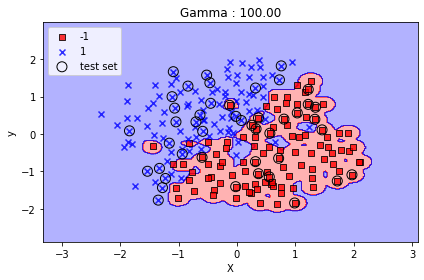

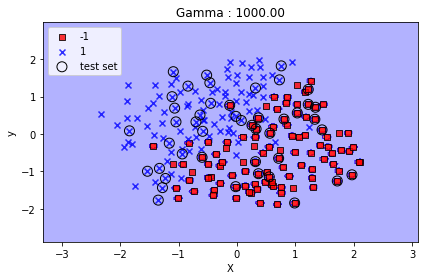

In [24]:
from sklearn.svm import SVC

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

k = [.1, 1, 10, 100, 1000]

i = .1

for i in k:
    svm = SVC(kernel='rbf', random_state=1, gamma=i, C=1.0)
    svm.fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, y_combined,
                          classifier=svm, test_idx=range(105, 150))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.title('Gamma : %0.2f' %i)
    plt.tight_layout()
    #plt.savefig('images/03_15.png', dpi=300)
    plt.show()
    
    i = i * 10

In [25]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 4


In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.818


In [27]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.818


## Number 2: 

In [28]:
from sklearn.datasets import load_breast_cancer
import numpy as np

X, y = load_breast_cancer(return_X_y=True)

print('Class labels:', np.unique(y))

Class labels: [0 1]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

### A 

Accuracy Test: 0.959
Accuracy Train: 0.962
Accuracy Test: 0.965
Accuracy Train: 0.982
Accuracy Test: 0.971
Accuracy Train: 0.990
Accuracy Test: 0.982
Accuracy Train: 0.992
Accuracy Test: 0.988
Accuracy Train: 0.995
Accuracy Test: 0.994
Accuracy Train: 0.997
Accuracy Test: 1.000
Accuracy Train: 1.000
Accuracy Test: 1.000
Accuracy Train: 1.000
Accuracy Test: 1.000
Accuracy Train: 1.000


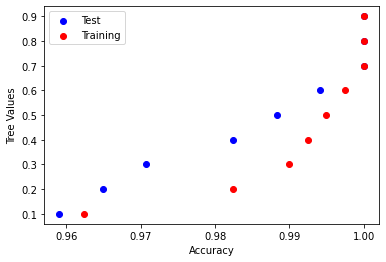

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

for i in range (1,10):
    tree_model = RandomForestClassifier(max_samples=i/10)
    tree_model.fit(X,y)
    
    y_pred = tree_model.predict(X_test)
    y_predi = tree_model.predict(X_train)
    
    acc = accuracy_score(y_test, y_pred)
    train = accuracy_score(y_train, y_predi)
    
    print('Accuracy Test: %.3f' % acc)
    print('Accuracy Train: %.3f' % train)
    
    plt.scatter(acc,i/10, color = 'blue')
    plt.scatter(train, i/10, color='red')
    i += 1
      
plt.xlabel('Accuracy')
plt.ylabel('Tree Values')

plt.legend(["Test","Training"])

plt.show()



### B 

Accuracy Test: 1 samples: 0.947
Accuracy Training: 1 samples: 0.960
Accuracy Test: 2 samples: 0.959
Accuracy Training: 2 samples: 0.967
Accuracy Test: 4 samples: 0.947
Accuracy Training: 4 samples: 0.960
Accuracy Test: 6 samples: 0.953
Accuracy Training: 6 samples: 0.965
Accuracy Test: 8 samples: 0.953
Accuracy Training: 8 samples: 0.970
Accuracy Test: 10 samples: 0.953
Accuracy Training: 10 samples: 0.967
Accuracy Test: 12 samples: 0.953
Accuracy Training: 12 samples: 0.967
Accuracy Test: 14 samples: 0.959
Accuracy Training: 14 samples: 0.965
Accuracy Test: 16 samples: 0.959
Accuracy Training: 16 samples: 0.965
Accuracy Test: 18 samples: 0.959
Accuracy Training: 18 samples: 0.962
Accuracy Test: 20 samples: 0.959
Accuracy Training: 20 samples: 0.962
Accuracy Test: 22 samples: 0.959
Accuracy Training: 22 samples: 0.960
Accuracy Test: 24 samples: 0.959
Accuracy Training: 24 samples: 0.962
Accuracy Test: 26 samples: 0.959
Accuracy Training: 26 samples: 0.962
Accuracy Test: 28 samples: 0.9

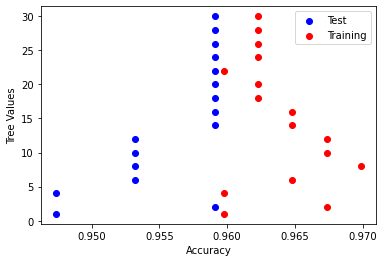

In [34]:
features = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
k=0
for feature in features:
  
    i = features[k]
    tree_model = RandomForestClassifier(max_features=feature, max_depth=2, random_state=0)
    tree_model.fit(X,y)
    
    y_pred = tree_model.predict(X_test)
    y_predi = tree_model.predict(X_train)
    
    acc = accuracy_score(y_test, y_pred)
    tra = accuracy_score(y_train, y_predi)
    
    print('Accuracy Test: ' + str(i) + ' samples: %.3f' % accuracy_score(y_test, y_pred))
    print('Accuracy Training: ' + str(i) + ' samples: %.3f' % accuracy_score(y_train, y_predi))


    
    plt.scatter(acc, feature, color = 'blue')
    plt.scatter(tra, feature, color = 'red')
    
    k+=1
    
plt.xlabel('Accuracy')
plt.ylabel('Tree Values')

plt.legend(["Test","Training"])

plt.show()

### C 

Accuracy Test: 10 samples: 0.947
Accuracy Training: 10 samples: 0.955
Accuracy Test: 100 samples: 0.947
Accuracy Training: 100 samples: 0.965
Accuracy Test: 300 samples: 0.953
Accuracy Training: 300 samples: 0.967
Accuracy Test: 600 samples: 0.953
Accuracy Training: 600 samples: 0.967
Accuracy Test: 1000 samples: 0.953
Accuracy Training: 1000 samples: 0.965


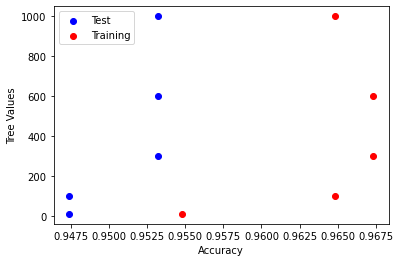

In [35]:
n = [10,100,300,600,1000]
k=0
for estimator in n:  
    i = n[k]
    tree_model = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    tree_model.fit(X,y)
    
    y_pred = tree_model.predict(X_test)
    y_predi = tree_model.predict(X_train)
    
    acc = accuracy_score(y_test, y_pred)
    
    train = accuracy_score(y_train, y_predi)
    
    print('Accuracy Test: ' + str(i) + ' samples: %.3f' % acc)
    print('Accuracy Training: ' + str(i) + ' samples: %.3f' % train)

    
    plt.scatter(acc, i, color = 'blue')
    plt.scatter(train, i, color = 'red')
    
    k+=1

plt.xlabel('Accuracy')
plt.ylabel('Tree Values')

plt.legend(["Test","Training"])
    
plt.show()

